# Kaggle - House Prices: Advanced Regression Techniques
### Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### Links:
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Table of Content 
- <b> Step 1: Setup </b>
    - Import Packages
    - Load Data
- <b> Step 2: Examine variable using intuition </b>
    - Assess each variable for feature selection: [Variable, Type, Segment, Expectation, Conclusion,Comment.]
    - Visualise data according to:
        - Numerical type 
        - Categorical type 
        - Time series type 
- <b> Step 3: Split dataset into two </b>
    - Numerical
    - Categorical
- <b> Step 4: Check the features with missing data </b>
    - Bar charts for both datasets
        - Remove the feautures with high percentage (>10%) of missing data 
- <b> Step 5: Check correlations </b>
    - Correlation Matrix (Heatmap)
        - Remove features with collinearity (>0.7 according to Dormann et. al 2012) 
    - Zoomed-in correlation matrix (See correlations with dependent variable)
    - Scatterplot (Assess relationship between dependent variable with )independent variables.
- <b> Step 6: Outlier handlings </b>

- <b> Step 7: Check the statistical assumptions </b>
    - Normality
    - Homoscedasticity
    - Linearity
    - Absence of correlated errors

- <b> Step 8: Dummy variable transformation (For categorical)</b>

- <b> Step 9: Export data</b>

- <b> Step X: EDA Report</b>

## Step 1 - Setup

### Import libraries

### Scipy & Pandas

In [33]:
import scipy.stats as stats
from scipy.stats import norm
import math, pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

### Visuals

In [29]:
from IPython.display import HTML, display
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

### Sklearn & Model Fitting

In [30]:
import sklearn.linear_model as linear_model
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

### Load Data
Look at each variable and try to understand their meaning and relevance to this problem

In [52]:
data_train = pd.read_csv('train.csv')
print(data_train.info(verbose = False))
data_train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB
None


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<b> Observation:</b> Highly influential variables
- OverallQual 
- YearBuilt
- TotalBsmtSF
- GrLivArea

### Analysing dependent variable - 'SalePrice'

In [47]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<b> Observation:</b> It's important to check if the min is 0, if so, we will need to handle it. 

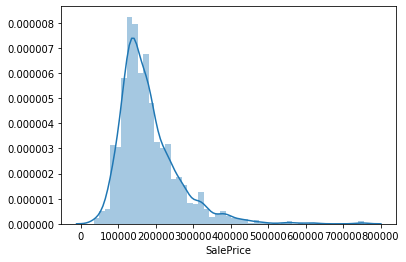

In [45]:
sns.distplot(data_train['SalePrice']);

#### Observations: 
1. Deviate from the normal distribution.
2. Have positive skewness.
3. Show peakedness.

In [50]:
#skewness and kurtosis
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<b> Observation:</b>

## Step 2 - Follow intuition to examine a small number of independent variables 

### Relationship between dependent variable and independent variables

#### For numerical data:

In [77]:
#scatter plot grlivarea/saleprice
def num_vars_relate(dataset, var, de_var):
    data = pd.concat([dataset[de_var], dataset[var]], axis=1)
    data.plot.scatter(x=var, y=de_var, ylim=(0,800000));

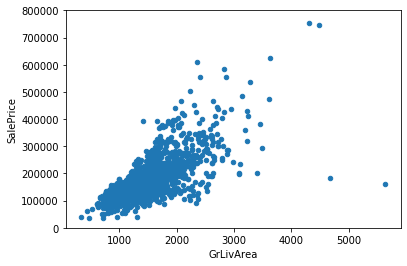

In [78]:
de_var = 'SalePrice'
num_vars_relate(data_train,'GrLivArea', de_var)

<b>Observation: </b> Linear relationship

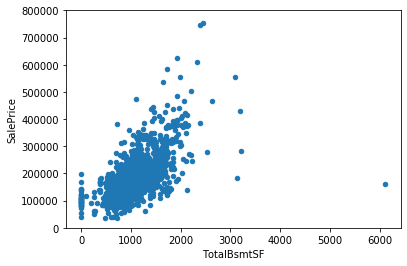

In [79]:
num_vars_relate(data_train,'TotalBsmtSF', de_var)

<b>Observation: </b> strong linear (exponential?) and 0 for some values of both variables.

### Relationship with categorical features

#### For categorical data:

In [80]:
#box plot overallqual/saleprice
def cat_vars_relate(dataset, ind_var, de_var):
    data = pd.concat([dataset[de_var], dataset[ind_var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=ind_var, y=de_var, data=data)
    fig.axis(ymin=0, ymax=800000);

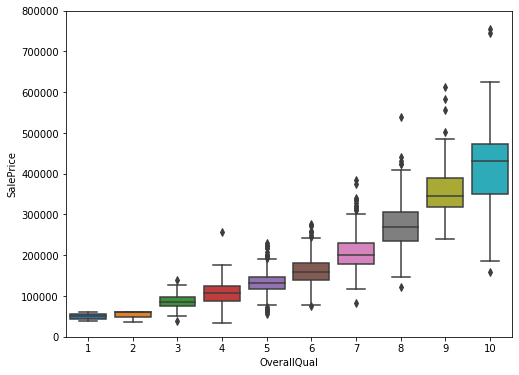

In [81]:
cat_vars_relate(data_train, 'OverallQual', de_var)

### Relationship with Time Series varibale

In [105]:
def time_series_relate(dataset, var, de_var):
    data = pd.concat([dataset[de_var], dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(24, 10))
    fig = sns.boxplot(x=var, y=de_var, data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);

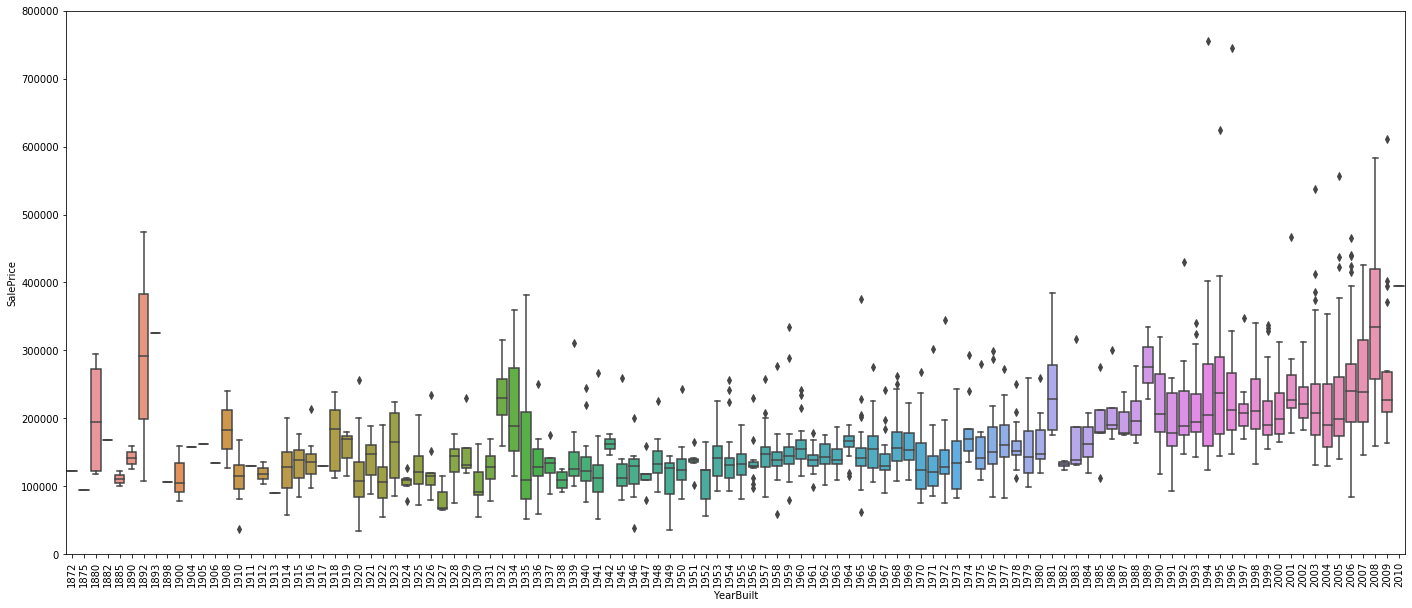

In [104]:
time_series_relate(data_train, 'YearBuilt', de_var)

<b>Observations: </b> As expected, the older buildings will be prized less than the modern ones. 

### Summary:
- 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
- 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

## Step 3: Split dataset into two
1. Numerical:   Num_data
2. Categorical: Cat_data

In [121]:
#38 Numerical , 43 categorical
num_col = []; cat_col = []; flag = 0
for i in raw_data.columns:
    for j in range(len(raw_data)):
        if isinstance(raw_data[i][j], str):
            flag = 1
            break
        else: 
            flag = 0
    if flag == 1:
        cat_col.append(i)
    else:
        num_col.append(i)

In [122]:
num_data = raw_data[num_col]; cat_data = raw_data[cat_col]; 

In [123]:
num_data.sample(n=4)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
228,229,20,70.0,8521,5,5,1967,1967,0.0,842,...,0,0,0,0,0,0,0,5,2010,125000
1006,1007,20,NaN,12155,6,3,1970,1970,0.0,1237,...,0,0,0,0,147,0,0,3,2007,163500
268,269,30,71.0,6900,5,6,1940,1955,0.0,403,...,0,25,0,0,0,0,0,2,2008,120500
850,851,120,36.0,4435,6,5,2003,2003,170.0,659,...,140,0,0,0,0,0,0,11,2007,131500


In [125]:
cat_data.head(n=2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Functions: 

## Step 4: Check the features with missing data 

#### Functions:

In [397]:
def table_miss(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (100*dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

def plot_ranking_miss(dataset, th = 0, title = '', return_list = False):
    """
    Input: 
        dataset - A dataset to be evaluated
        th - In percentage, if the missing percentage is above the th, store in missing_th
    Display: A bar chart with the percentage of missing data over all variables in the dataset. 
    Output:
        missing:(pd.series) all variable with any missing data along with their percentage of missing. 
        missing_th:(pd.series) all variable with percentage missing data > th, along with their count of missing. 
    """
    missing = dataset.isnull().sum()
    missing = missing[missing > 0]
    missing_th = missing[100*missing/len(dataset) > th]
    missing = (missing/len(dataset))*100
    missing.sort_values(inplace=True)
    missing.plot.bar()
    plt.xlabel('Attributes');plt.ylabel('Percentage (%)'); plt.title(title)
    if return_list == True:
        return missing, missing_th

# Plot the percentage of Nan across attr, use this after using 'nan_counter' function.
def plot_percent_bar(nan_dict, th, x_label, y_label, title, scale_y = True):
    label = list(nan_dict.keys()); ys = list(nan_dict.values()); label_new = []
    for i in nan_dict.keys():
        label_new.append('') if nan_dict[i] == 0 else label_new.append(i)
    # this is for plotting purpose
    figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    index = np.arange(len(label))
    plt.bar(index, ys, color="blue", align = 'center')
    plt.xlabel(x_label, fontsize=10); plt.ylabel(y_label, fontsize=10)
    plt.xticks(index, label_new, fontsize=10, rotation=90)
    plt.hlines(y=th, xmin=index[0]-0.5, xmax=len(nan_dict), color="r", linestyles="dashed")
    plt.title(title)
    if scale_y == True:
        plt.ylim(0, 100)
    plt.show()

    

#### For Numerical data

<b> Overall (Entire dataset): </b>

In [399]:
missing_all = table_miss(data_train)
missing_all.head(10)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


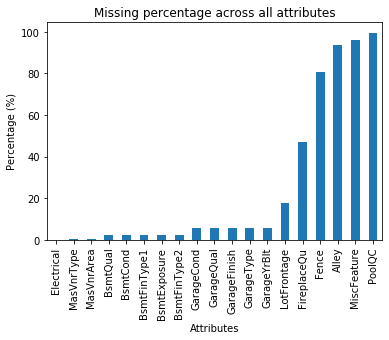

In [334]:
plot_ranking_miss(data_train, title = 'Missing percentage across all attributes')

<b> Numerical dataset </b>

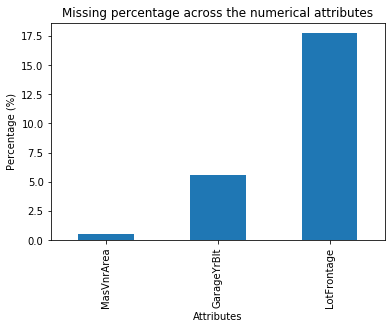

In [338]:
num_miss_list, num_missing_th = plot_ranking_miss(num_data, 10, \
                                title = 'Missing percentage across the numerical attributes', return_list = True)
num_miss_dict = num_miss_list.to_dict()

<b> Categorical dataset </b>

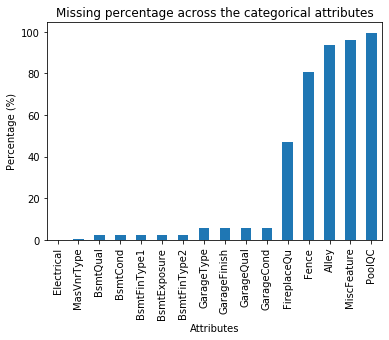

In [339]:
cat_miss_list, cat_missing_th = plot_ranking_miss(cat_data, 10, \
                                title = 'Missing percentage across the categorical attributes', return_list = True)
cat_miss_dict = cat_miss_list.to_dict()

#### Numerical dataset (Zoom-In)

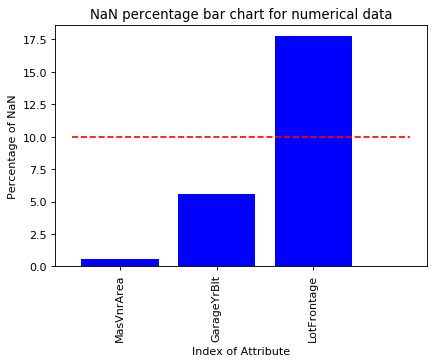

In [340]:
plot_percent_bar(num_miss_dict, 10, \
           'Index of Attribute', 'Percentage of NaN', 'NaN percentage bar chart for numerical data', scale_y = False)

#### Categorical dataset (Zoom-In)

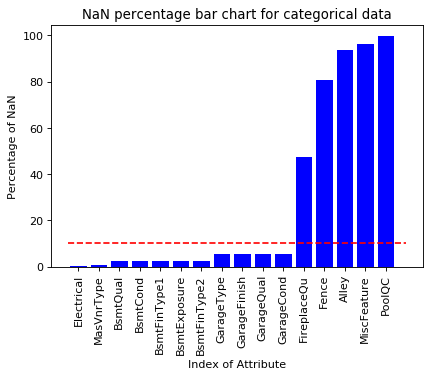

In [341]:
plot_percent_bar(cat_miss_dict, 10, \
           'Index of Attribute', 'Percentage of NaN', 'NaN percentage bar chart for categorical data', scale_y = False)

#### Remove the feautures with high percentage (>10%) of missing data 

In [409]:
cat_missing_th = cat_missing_th.index.to_list(); num_missing_th = num_missing_th.index.to_list()
# x_num_data = num_data[:]; x_cat_data  = cat_data[:]

AttributeError: 'builtin_function_or_method' object has no attribute 'to_list'

In [410]:
print(num_data.shape); num_data = num_data.drop(num_missing_th, axis = 1)
print(num_data.shape)

(1460, 38)
(1460, 37)


In [411]:
print(cat_data.shape); cat_data = cat_data.drop(cat_missing_th, axis = 1)
print(cat_data.shape)

(1460, 43)
(1460, 38)


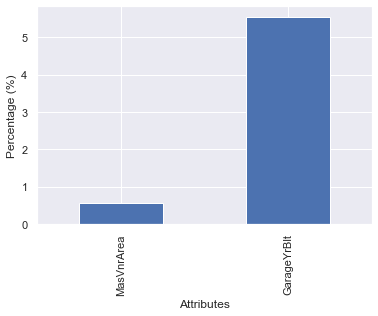

In [412]:
plot_ranking_miss(num_data)

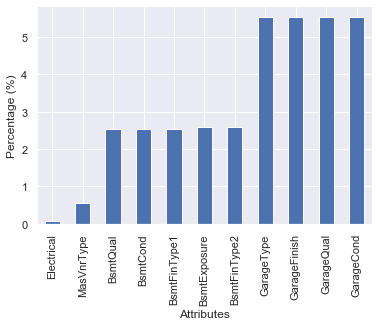

In [413]:
plot_ranking_miss(cat_data)

<b> Summary: </b>
- To handle missing data, we'll delete all the variables with missing data percentage above 10%, then impute the rest of the variables with missing data.

## Step 5: Check correlations

#### Functions:

In [414]:
# Correlations
def heatmap(var):
    f, ax = plt.subplots(figsize=(20, 12))
    sns.heatmap(var, linewidths=1, vmin=0, vmax=1, square=True)
    plt.show();

def bool_heatmap(corr, th):    
    save_list = []
    corr_ar = np.array(corr); corr_ar_bool = abs(np.array(corr)*0)
    for i in range(len(corr_ar)):
        for j in range(len(corr_ar)):
            if corr_ar[i][j] >= th:
                corr_ar_bool[i][j] = 1
                if i != j:
                    save_list.append((i,j))
    heatmap(corr_ar_bool)
    return save_list

#### Correlation matrix (heatmap)

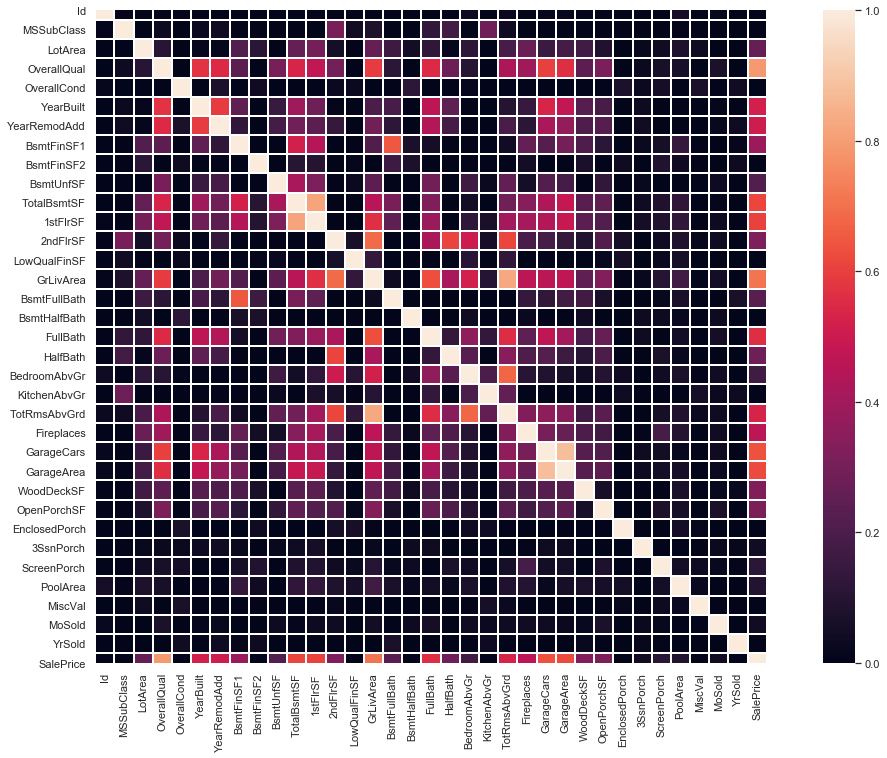

In [416]:
corr_num = num_data.corr(); heatmap(corr)

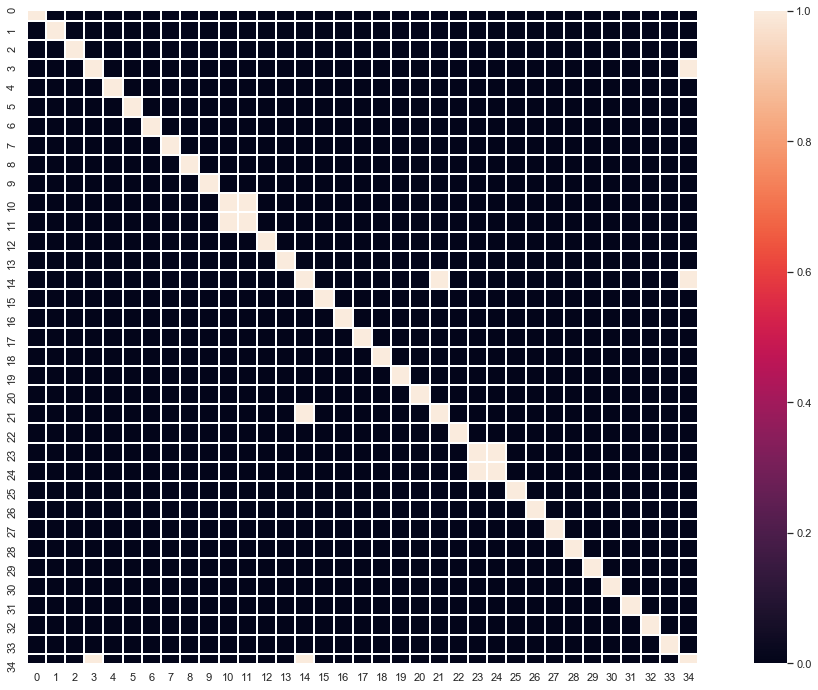

In [417]:
h_corr_list = bool_heatmap(corr, 0.7)

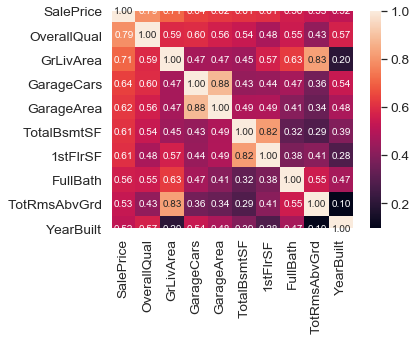

In [377]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_num.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

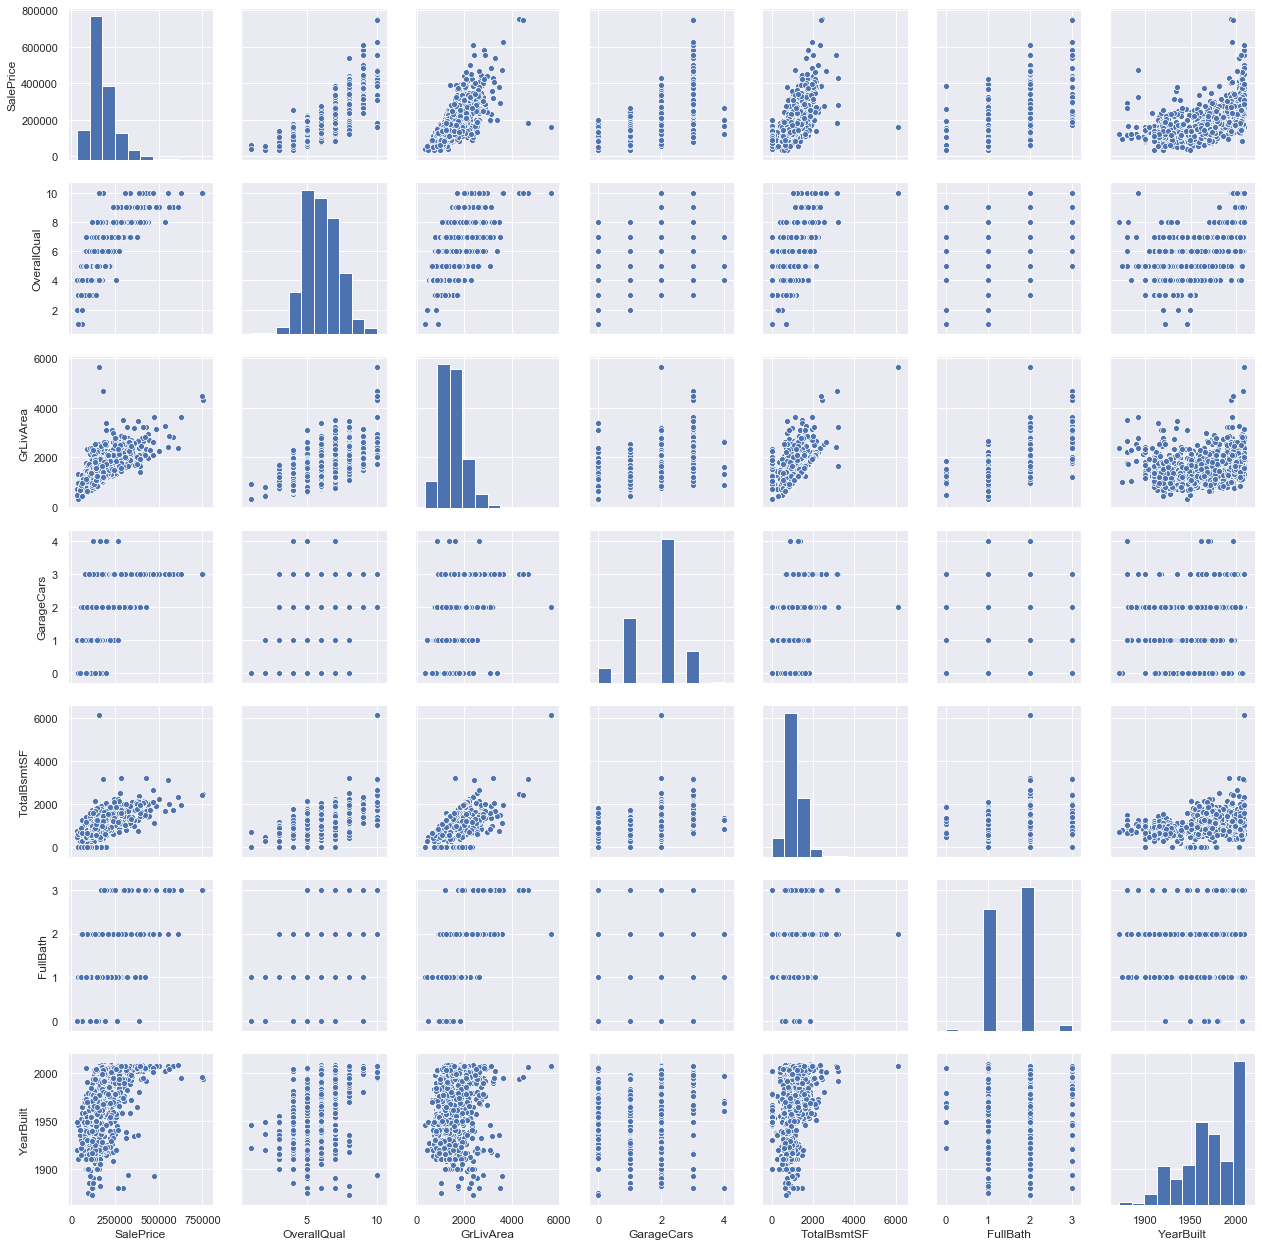

In [379]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show();

<b> Observations: </b> 
- This scatter plot gives us a reasonable idea about variables relationships.
- For 'TotalBsmtSF' and 'GrLiveArea': Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area

## Step 6: Outlier handlings

#### Univariate analysis (With standardization)

In [457]:
saleprice_scaled = StandardScaler().fit_transform(num_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83667289]
 [-1.83150272]
 [-1.79893441]
 [-1.78132311]
 [-1.77251747]
 [-1.62156352]
 [-1.61527377]
 [-1.58382503]
 [-1.58382503]
 [-1.57133359]]

outer range (high) of the distribution:
[[3.82535807]
 [4.03715904]
 [4.49207134]
 [4.70592277]
 [4.72581095]
 [5.05730582]
 [5.41863925]
 [5.58648746]
 [7.09602693]
 [7.22182189]]


<b>Observations: </b> 
- Low range values are OK and not too far from 0.
- High range values are far from 0 and the 7+ values are far away from the crowd.

<b>Verdict:</b> No value should be removed.

#### Bivariate analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


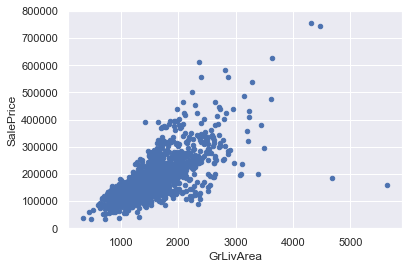

In [439]:
#bivariate analysis saleprice/grlivarea
num_vars_relate(num_data,'GrLivArea', de_var)

In [440]:
num_data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1298,1299,60,63887,10,5,2008,2008,796.0,5644,0,...,214,292,0,0,0,480,0,1,2008,160000
523,524,60,40094,10,5,2007,2008,762.0,2260,0,...,208,406,0,0,0,0,0,10,2007,184750


In [441]:
num_data = num_data.drop(num_data[num_data['Id'] == 1299].index)
num_data = num_data.drop(num_data[num_data['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


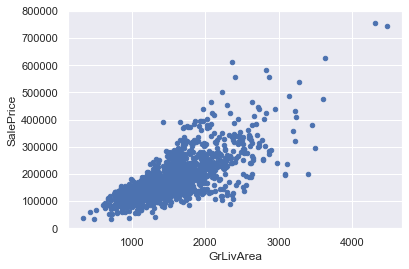

In [442]:
#bivariate analysis saleprice/grlivarea
num_vars_relate(num_data,'GrLivArea', de_var)

<b>Verdict:</b> Two datapoints are removed, the largest two in 'GrLivArea' dimension.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


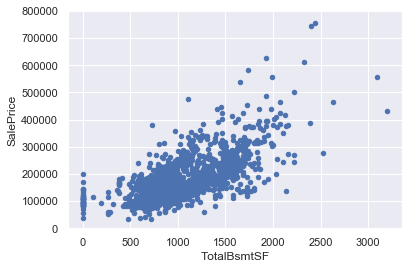

In [449]:
#bivariate analysis saleprice/TotalBsmtSF
num_vars_relate(num_data,'TotalBsmtSF', de_var)

In [450]:
num_data.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
496,497,20,12692,8,5,1992,1993,0.0,1231,0,...,264,75,291,0,0,0,0,5,2007,430000


In [451]:
num_data = num_data.drop(num_data[num_data['Id'] == 333].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


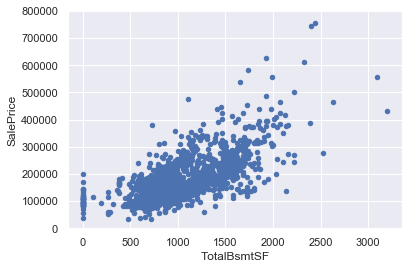

In [452]:
#bivariate analysis saleprice/TotalBsmtSF
num_vars_relate(num_data,'TotalBsmtSF', de_var)

<b>Verdict:</b> One datapoints are removed, the largest point in 'TotalBsmtSF' dimension.

## Step 7: Check the statistical assumptions

#### According to Hair et al. (2013), four assumptions should be tested:
- Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

- Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

- Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

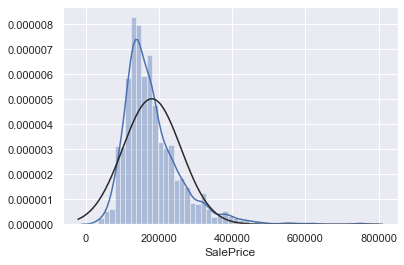

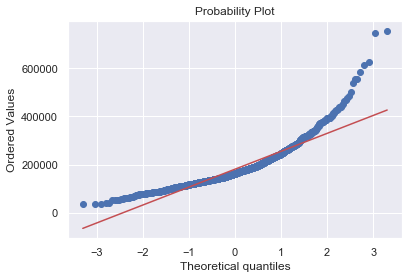

In [456]:
#histogram and normal probability plot
sns.distplot(num_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['SalePrice'], plot=plt)

<b>Observations: </b> 
- 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

In [459]:
#applying log transformation
num_data['SalePrice'] = np.log(num_data['SalePrice'])

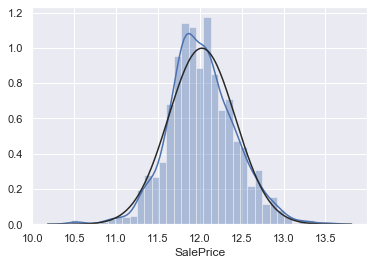

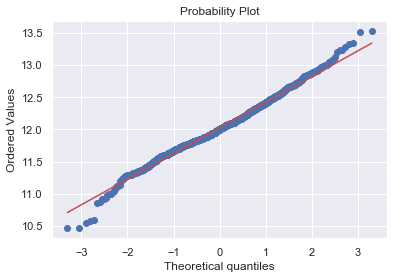

In [460]:
#histogram and normal probability plot
sns.distplot(num_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['SalePrice'], plot=plt)

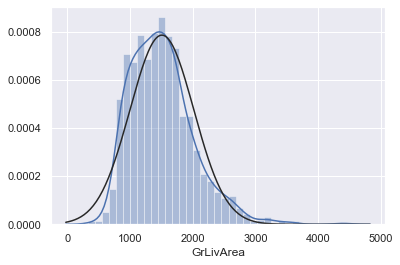

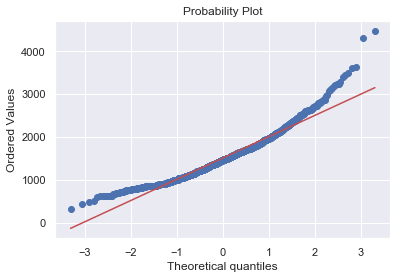

In [461]:
sns.distplot(num_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['GrLivArea'], plot=plt)

In [462]:
#applying log transformation
num_data['GrLivArea'] = np.log(num_data['GrLivArea'])

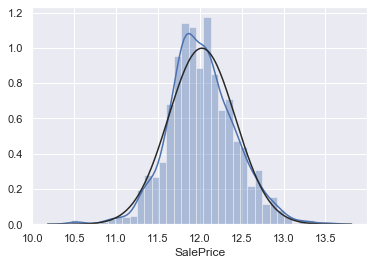

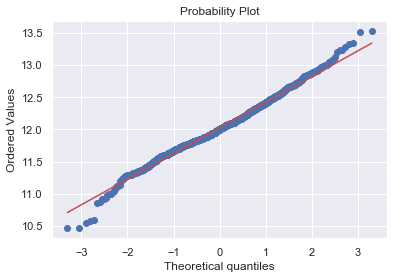

In [463]:
#histogram and normal probability plot
sns.distplot(num_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['SalePrice'], plot=plt)

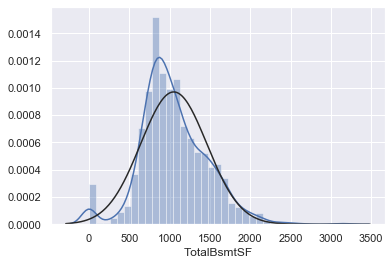

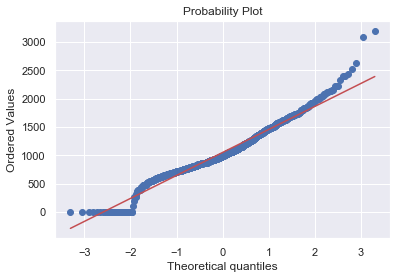

In [464]:
#histogram and normal probability plot
sns.distplot(num_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['TotalBsmtSF'], plot=plt)

<b>Remarks:</b>

1. A significant number of observations with value zero (houses without basement).
2. A big problem because the value zero doesn't allow us to do log transformations.
3. To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. 

This way we can transform data, without losing the effect of having or not basement.

In [469]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
num_data['HasBsmt'] = pd.Series(len(num_data['TotalBsmtSF']), index=num_data.index)
num_data['HasBsmt'] = 0 
num_data.loc[num_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [471]:
#transform data
num_data.loc[num_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(num_data['TotalBsmtSF'])

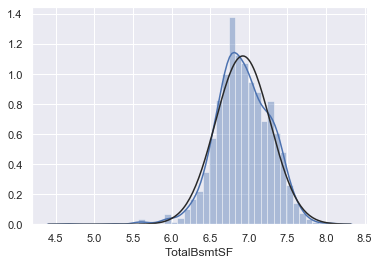

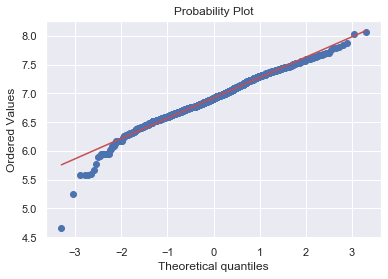

In [473]:
#histogram and normal probability plot
sns.distplot(num_data[num_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data[num_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

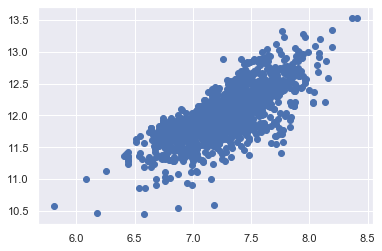

In [478]:
#scatter plot
plt.scatter(num_data['GrLivArea'], num_data['SalePrice']);

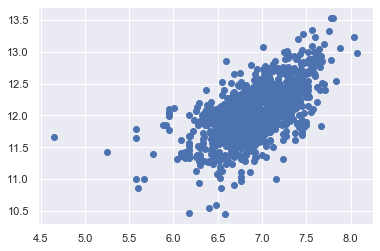

In [480]:
#scatter plot
plt.scatter(num_data[num_data['TotalBsmtSF']>0]['TotalBsmtSF'], num_data[num_data['TotalBsmtSF']>0]['SalePrice']);

## Step 8 : Dummy variable transformation

In [404]:
cat_dum_train = pd.get_dummies(cat_data)
print(cat_dum_train.shape); print(cat_data.shape)

(1460, 234)
(1460, 38)


In [408]:
num_dum_train = pd.get_dummies(num_data)
print(num_dum_train.shape); print(num_data.shape) #Expected to be the same

(1460, 37)
(1460, 37)


## Step 9: Export data

## Step X: EDA Report 
- ... 

## Reference:
- Many of the strategies proposed by Hair et al. (2013) has been used